In [145]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [146]:
read_file = pd.read_excel(r'/content/for_clustering.xlsx')
read_file.to_csv(r'/content/for_clustering.csv', index=None, header=True)
df = pd.read_csv('/content/for_clustering.csv')
# c csv работает быстрее

In [147]:
print(df.info())
print(df.isna().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27508 entries, 0 to 27507
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id_client                 27508 non-null  int64  
 1   InWeek_amount             27508 non-null  float64
 2   InWeek_SKU                27508 non-null  int64  
 3   Checkinmonth_average      27508 non-null  int64  
 4   Checkamount_mean          27508 non-null  float64
 5   Count_transac             27508 non-null  int64  
 6   Total_amount              27508 non-null  float64
 7   Total_SKU_qnt             27508 non-null  int64  
 8   Count_departments         27508 non-null  int64  
 9   Count_shop                27508 non-null  int64  
 10  Count_city                27508 non-null  int64  
 11  Tenure                    27508 non-null  int64  
 12  SKU_meanbytransac         27508 non-null  int64  
 13  Amount_last6mnth          27508 non-null  float64
 14  Check_

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,Count_city,Tenure,SKU_meanbytransac,Amount_last6mnth,Check_qntlast6mnth,SKU_price_mean,Gender,Age,Age_group,Interval_visit,Days_pastvisit,Cat_householdchem_qnt,Cat_householdchem_amount,Cat_householdchem_share,Cat_careproducts_qnt,Cat_careproducts_amount,Cat_careproducts_share,Cat_toiletries_qnt,Cat_toiletries_amount,Cat_toiletries_share,Cat_healthwellnes_qnt,Cat_healthwellnes_amount,Cat_healthwellnes_share,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,1,12,3,1295.44,22,10.360064,F,37.0,35-45,11,3,175,2747.71,0.221616,278,3490.27,0.281507,420,4096.35,0.330391,161,1059.810,0.085479,80,1004.370,0.081007,1,1,60,12,963.01,1,1,2,2
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,1,10,2,1835.23,17,12.088369,F,29.0,25-35,11,2,199,4097.59,0.316181,279,4027.09,0.310741,407,3303.69,0.254921,93,1054.805,0.081391,46,476.475,0.036766,1,0,91,15,1534.69,1,1,2,2
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,1,6,4,586.79,7,15.591491,F,33.0,25-35,29,8,18,121.36,0.040946,62,2013.35,0.679295,39,159.50,0.053815,34,334.830,0.112970,17,334.840,0.112974,1,1,13,2,1514.48,1,1,3,3
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,1,12,1,1374.17,36,7.703276,F,50.0,45-55,11,0,798,5176.77,0.263096,500,5094.25,0.258902,995,7777.19,0.395256,129,1088.880,0.055340,64,539.250,0.027406,1,0,68,35,1872.24,1,1,2,2
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,1,5,4,1469.43,11,9.278015,F,33.0,25-35,14,8,59,639.32,0.257558,73,807.58,0.325343,90,264.95,0.106738,22,664.180,0.267573,11,106.210,0.042788,1,1,22,3,557.97,1,1,1,1


In [148]:
df.groupby(['Age_group','Gender'])['Total_amount'].describe()

count          mean  ...         75%       max
Age_group Gender                        ...                      
0-25      F       1303.0   8798.925940  ...  11345.7550  22647.38
          M        602.0   8915.136013  ...  11443.3650  22714.92
25-35     F       4682.0   9598.619759  ...  12484.0175  22730.31
          M       2439.0   9702.433801  ...  12818.1900  22698.56
35-45     F       4633.0   9986.680973  ...  13174.3900  22730.68
          M       2242.0   9909.955143  ...  13393.2775  22710.07
45-55     F       3452.0   9872.947966  ...  13041.0725  22748.39
          M       1489.0  10132.781169  ...  13504.2200  22736.32
55-65     F       3043.0   9288.881213  ...  12139.4300  22742.32
          M       1028.0   9519.401917  ...  12227.8975  22653.98
65+       F       1668.0   8335.758801  ...  10838.0975  22650.45
          M        686.0   9217.207638  ...  12028.5700  22737.15

[12 rows x 8 columns]

In [149]:
df.groupby(['Gender','Age_group']).agg({'Total_amount': 'sum'})

Total_amount
Gender Age_group              
F      0-25       1.146500e+07
       25-35      4.494074e+07
       35-45      4.626829e+07
       45-55      3.408142e+07
       55-65      2.826607e+07
       65+        1.390405e+07
M      0-25       5.366912e+06
       25-35      2.366424e+07
       35-45      2.221812e+07
       45-55      1.508771e+07
       55-65      9.785945e+06
       65+        6.323004e+06

In [150]:
df['Tenure'].describe()

count    27508.000000
mean         9.872401
std          2.120812
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         12.000000
Name: Tenure, dtype: float64

**Самыми активными являются возростные группы 25-35 и 25-45, при этом вы видим, что женщин почти вдвое больше чем мужчин, всех больше трат совершают женщины от 35-45 лет, среди мужчин, всех больше тратят люди 25-35 лет, в среднем наши клиенты с нами более 9 месяцев**

### Так как я не знаю всех вводных бизнес задачи. Возьму только значимые, по моему мнению признаки, для общей сегментации клиентов, сведу все к RFM анализу, после чего можно будет расширить или сузить сегмент за счет введения нового показателя


In [151]:
df_1 = df[['Id_client','Total_amount', 'Interval_visit', 'Days_pastvisit']]
df_1
# проводил нормализацию по признакам, результат тот же 

,Id_client,Total_amount,Interval_visit,Days_pastvisit
0,5743,12398.51,11,3
1,5756,12959.65,11,2
2,5781,2963.88,29,8
3,5801,19676.34,11,0
4,5808,2482.24,14,8
...,...,...,...,...
27503,822495,6164.92,16,6
27504,822844,3653.61,14,8
27505,823011,7509.19,12,7
27506,823218,8612.11,13,8


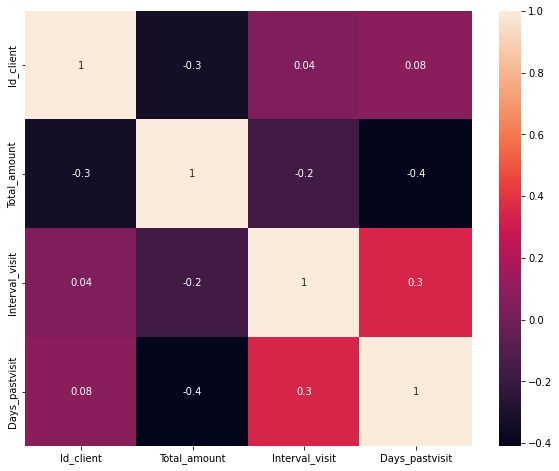

In [152]:
corr_matrix = df_1.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, fmt='.1g')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


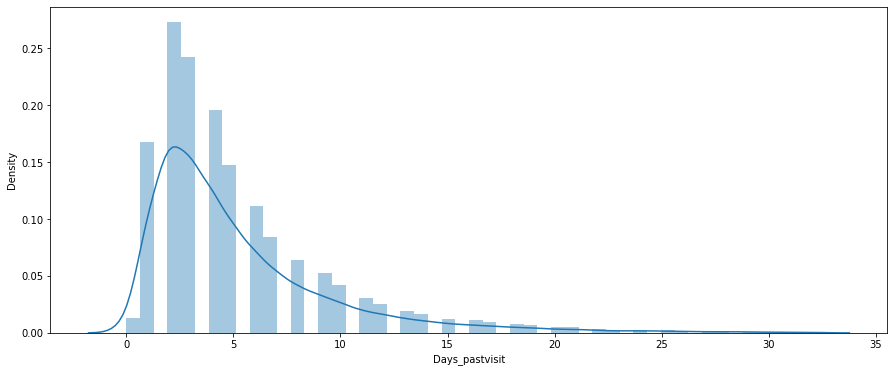

In [153]:
plt.subplots(figsize=(15, 6))
sns.distplot(df_1['Days_pastvisit'])

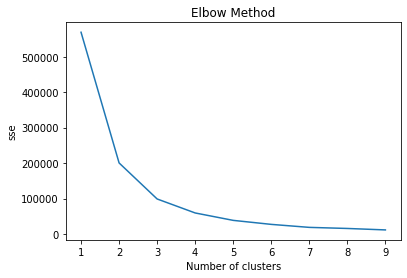

In [154]:
sse=[]
X = df_1[['Days_pastvisit']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1,10),sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

Здесь 4 группы являются оптимальным. Основываясь на бизнес-требованиях, мы можем использовать меньше или больше кластеров. Мы выберем 4 для этого примера:

In [155]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_1[['Days_pastvisit']])
df_1['Days_pastvisit_Cluster'] = kmeans.predict(df_1[['Days_pastvisit']])

def order_cluster(cluster_field_name, target_field_name, df_n, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df_n.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df_n,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_1 = order_cluster('Days_pastvisit_Cluster', 'Days_pastvisit', df_1, False)
df_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id_client,Total_amount,Interval_visit,Days_pastvisit,Days_pastvisit_Cluster
0,5743,12398.51,11,3,3
1,5756,12959.65,11,2,3
2,5801,19676.34,11,0,3
3,5820,3927.88,11,4,3
4,5828,9808.45,11,2,3
...,...,...,...,...,...
27503,753937,7955.77,24,12,1
27504,802547,3046.05,15,12,1
27505,813952,2675.77,27,15,1
27506,814001,2804.61,11,11,1


In [156]:
df_1.groupby(['Days_pastvisit_Cluster']).agg({'Days_pastvisit' : 'describe'})

Days_pastvisit                       ...                  
                                count       mean       std  ...   50%   75%   max
Days_pastvisit_Cluster                                      ...                  
0                               800.0  22.201250  3.822173  ...  21.0  25.0  32.0
1                              2922.0  12.401780  2.162700  ...  12.0  14.0  17.0
2                              8083.0   6.481381  1.362340  ...   6.0   8.0   9.0
3                             15703.0   2.495192  1.073333  ...   2.0   3.0   4.0

[4 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


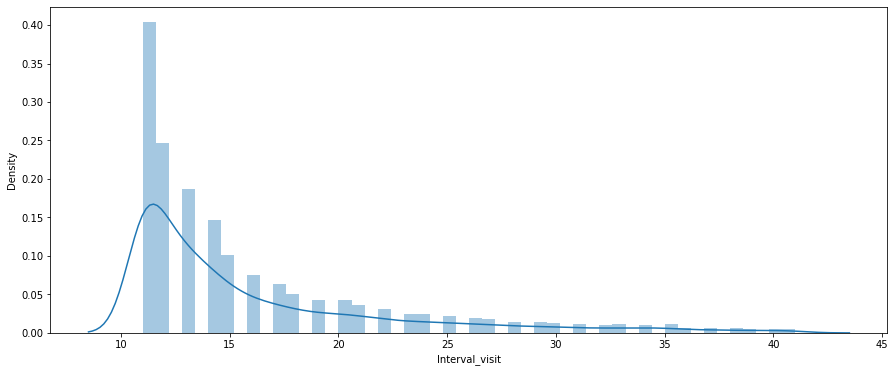

In [157]:
plt.subplots(figsize=(15, 6))
sns.distplot(df_1['Interval_visit'])

In [158]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_1[['Interval_visit']])
df_1['Interval_visit_Cluster'] = kmeans.predict(df_1[['Interval_visit']])
df_1 = order_cluster('Interval_visit_Cluster', 'Interval_visit', df_1, False)
df_1.groupby('Interval_visit_Cluster')['Interval_visit'].describe()

,count,mean,std,min,25%,50%,75%,max
Interval_visit_Cluster,,,,,,,,
0,1680.0,34.446429,3.284702,30.0,32.0,34.0,37.0,41.0
1,3382.0,24.238616,2.539859,21.0,22.0,24.0,26.0,29.0
2,6200.0,16.961452,1.696708,15.0,15.0,17.0,18.0,20.0
3,16246.0,12.078973,1.091834,11.0,11.0,12.0,13.0,14.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


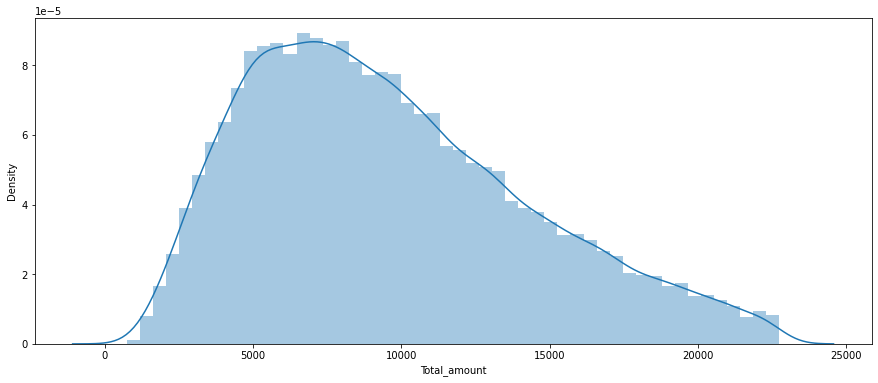

In [159]:
plt.subplots(figsize=(15, 6))
sns.distplot(df_1['Total_amount'])

In [160]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_1[['Total_amount']])
df_1['Total_amount_Cluster'] = kmeans.predict(df_1[['Total_amount']])
df_1 = order_cluster('Total_amount_Cluster', 'Total_amount', df_1, True)
df_1.groupby('Total_amount_Cluster')['Total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Total_amount_Cluster,,,,,,,,
0,8244.0,4551.058463,1277.614112,739.36,3626.6375,4737.785,5613.1225,6493.53
1,9141.0,8461.262747,1177.414036,6494.51,7439.4600,8417.510,9465.5400,10620.33
2,6586.0,12791.897909,1407.865157,10620.87,11563.2950,12662.890,13940.1350,15567.90
3,3537.0,18334.585872,1950.801505,15568.24,16644.6100,18000.370,19775.7200,22748.39


In [161]:
df_1

,Id_client,Total_amount,Interval_visit,Days_pastvisit,Days_pastvisit_Cluster,Interval_visit_Cluster,Total_amount_Cluster
0,5743,12398.51,11,3,3,3,2
1,5756,12959.65,11,2,3,3,2
2,5934,14221.33,12,3,3,3,2
3,5953,11128.80,11,1,3,3,2
4,6284,10820.57,14,3,3,3,2
...,...,...,...,...,...,...,...
27503,411078,8534.74,23,15,1,1,1
27504,411293,6709.29,25,10,1,1,1
27505,662013,7594.52,26,14,1,1,1
27506,724722,8567.68,24,11,1,1,1


In [162]:
df_1['OverallScore'] = df_1['Days_pastvisit_Cluster'] + df_1['Interval_visit_Cluster'] + df_1['Total_amount_Cluster']
df_1.groupby('OverallScore')['Days_pastvisit','Interval_visit','Total_amount'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Days_pastvisit,Interval_visit,Total_amount
OverallScore,,,
0,22.355932,34.584746,3574.865932
1,16.848614,31.226013,4148.184733
2,13.076775,27.035509,4755.711507
3,10.867863,23.154976,5531.593997
4,8.254727,19.660734,6302.000712
5,5.988389,16.947381,7169.727031
6,4.273840,14.700719,8287.036308
7,3.144334,13.218252,10310.889756
8,2.495173,12.451848,13813.352051


Приведенный выше балл ясно показывает нам, что клиенты с 8 баллами являются нашими лучшими клиентами, в то время как 0-худшие

## Вариант №1. Складываем получившиеся оценки и на их основе даем название сегмента

In [163]:
df_1['Segment'] = 'Low-Value'
df_1.loc[df_1['OverallScore']>2,'Segment'] = 'Mid-Value' 
df_1.loc[df_1['OverallScore']>5,'Segment'] = 'High-Value' 

In [164]:
df_1.groupby(['Segment'])['Id_client'].count()

Segment
High-Value    17295
Low-Value      1629
Mid-Value      8584
Name: Id_client, dtype: int64

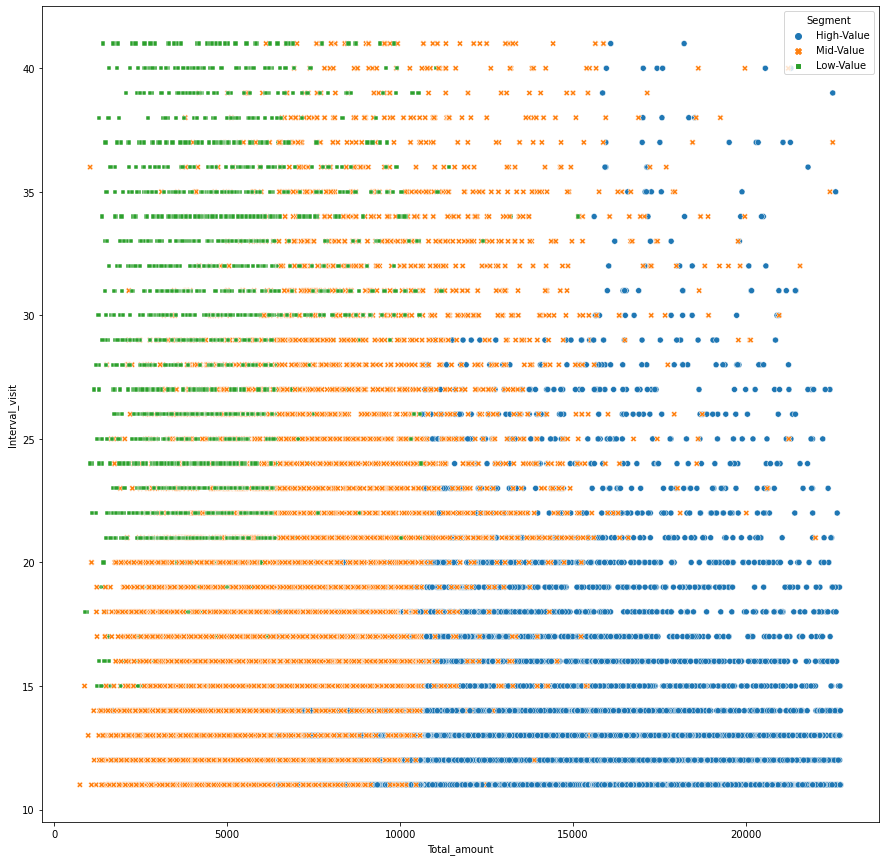

In [165]:
plt.subplots(figsize=(15, 15))
sns.scatterplot(data=df_1, x="Total_amount", y="Interval_visit", hue="Segment", style="Segment")

## Вариант №2. Складываем как строки получившиеся оценки и на их основе даем название сегмента

In [166]:
df_1['RFMScore'] = df_1.Days_pastvisit_Cluster.map(str) + df_1.Interval_visit_Cluster.map(str) + df_1.Total_amount_Cluster.map(str)
df_1

,Id_client,Total_amount,Interval_visit,Days_pastvisit,Days_pastvisit_Cluster,Interval_visit_Cluster,Total_amount_Cluster,OverallScore,Segment,RFMScore
0,5743,12398.51,11,3,3,3,2,8,High-Value,332
1,5756,12959.65,11,2,3,3,2,8,High-Value,332
2,5934,14221.33,12,3,3,3,2,8,High-Value,332
3,5953,11128.80,11,1,3,3,2,8,High-Value,332
4,6284,10820.57,14,3,3,3,2,8,High-Value,332
...,...,...,...,...,...,...,...,...,...,...
27503,411078,8534.74,23,15,1,1,1,3,Mid-Value,111
27504,411293,6709.29,25,10,1,1,1,3,Mid-Value,111
27505,662013,7594.52,26,14,1,1,1,3,Mid-Value,111
27506,724722,8567.68,24,11,1,1,1,3,Mid-Value,111


Оценки RFM дают нам 4^3 = 64 сегмента.
Можно более узконаправленно выделить сегменты.

**После выделения сегментов и группировки по ним, в каждой группе отдельно посмотреть какие категории и в каком соотношении покупал клиент (задействовать таблицу for_clustering.csv, опираясь на другие признаки в зависимости он наших целей), после этого принимать маркетинговые меры.**